<a href="https://colab.research.google.com/github/NiviShukla/Predictive-Analysis/blob/main/Predictive%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Here we are analysing the stocks of 5 years of S&P
We import all the libraries required for the EDA

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
uploaded = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [8]:
df = pd.read_csv('all_stocks_5yr.csv')

The given Dataset with date as index and open and closing stocks with high and low values.

In [16]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


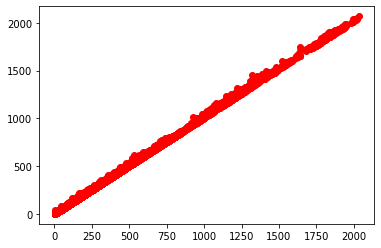

In [27]:
plt.scatter(df.low,df.high,label="High vs low",color = 'r')

In [14]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


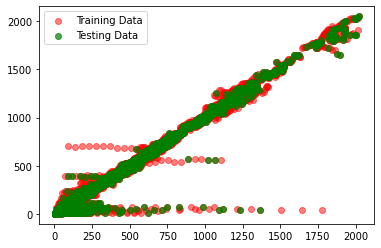

In [29]:
# create a feature (independent variable) - moving average
df['ma'] = df['close'].rolling(window=14).mean()

# preprocessing: drop NaN values
df.dropna(inplace=True)

# preprocessing: convert data into arrays for scikit-learn
X = df['ma'].values.reshape(-1, 1)
y = df['close'].values

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X,y,label="Training Data",color='r',alpha=0.5)
plt.scatter(x_test,y_test,label="Testing Data",color='g',alpha=0.7)

plt.legend()
plt.show()
# train a linear regression model

As we can see from the plotting that the data is linear.\
So we create a Linear Regression model and predict for future prices.

We are also calculate the r2 score of the model as well as the mean squared error of the model to see how efficient our model is.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-score:", r2)

Mean Squared Error: 129.6508972105156
R-Squared: 0.9866795174113023


As we can see the MSE is 129.65 \
while the r2 score is 0.9866 which is pretty accurate for the model.

In [22]:
LR = LinearRegression()
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)


#Linear Regression Model and Prediction 

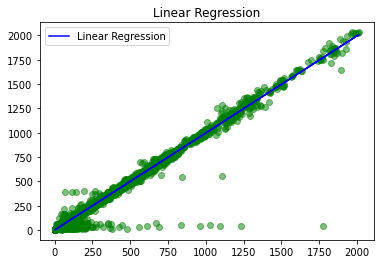

In [23]:
plt.plot(x_test,prediction,label="Linear Regression",color='b')
plt.scatter(x_test,y_test,color='g',alpha=0.5)
plt.legend()
plt.title("Linear Regression")
plt.show()

In [26]:
LR.predict(np.array([[1000],[500]]))[0]

998.2539784380824